# mm_kidneys_GSE107585_1_marker.ipynb

获取健康小鼠肾脏各初级细胞类型的marker,为注释LN小鼠肾脏细胞提供参考

输出为`markers_pre_cell_type.csv`。这个marker真邪门

重新对免疫细胞进行注释

更新日期2024年4月20日

In [1]:
library(cowplot)
source(file.path('~/link/res_publish','func_r_map_seurat.r'))
item = 'm_kidneys_GSE107585'
p_root_item = file.path('.')
p_plot_item = file.path(p_root_item,'fig')
if(!dir.exists(p_plot_item)){
    dir.create(p_plot_item,recursive = TRUE)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching packag


> function----------------------------------------
serurat_to_mtx

> Map_Seurat function-----------------------------
Map_Seurat_normalize
Map_Seurat_cluster
Map_Seurat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap


# Seurat 标准流程

In [2]:
if(file.exists(file.path(p_root_item,'m_kidneys_GSE107585.rds'))){
    cat(sprintf('[read] rds\n'))
    adata = readRDS(file.path(p_root_item,'m_kidneys_GSE107585.rds'))
}else{
    # 质控
    adata = load_seuratobj(file.path(p_cache,'healthy','m_kidney'))
    adata[["percent.mt"]] = PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
    options(repr.plot.width = 3*6,repr.plot.height = 1*6)
    print(VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3))
    # adata <- subset(adata, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 5)
    # options(repr.plot.width = 3*6,repr.plot.height = 1*6)
    # VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
    # 标准流程
    adata@meta.data %>% head(2)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_normalize(adata)
    # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_cluster(
        adata,dims=1:20,resolution = 0.2)
    adata@meta.data %>% head(2)
    saveRDS(adata,file.path(p_root_item,'m_kidneys_GSE107585.rds'))
}

[read] rds


# plot

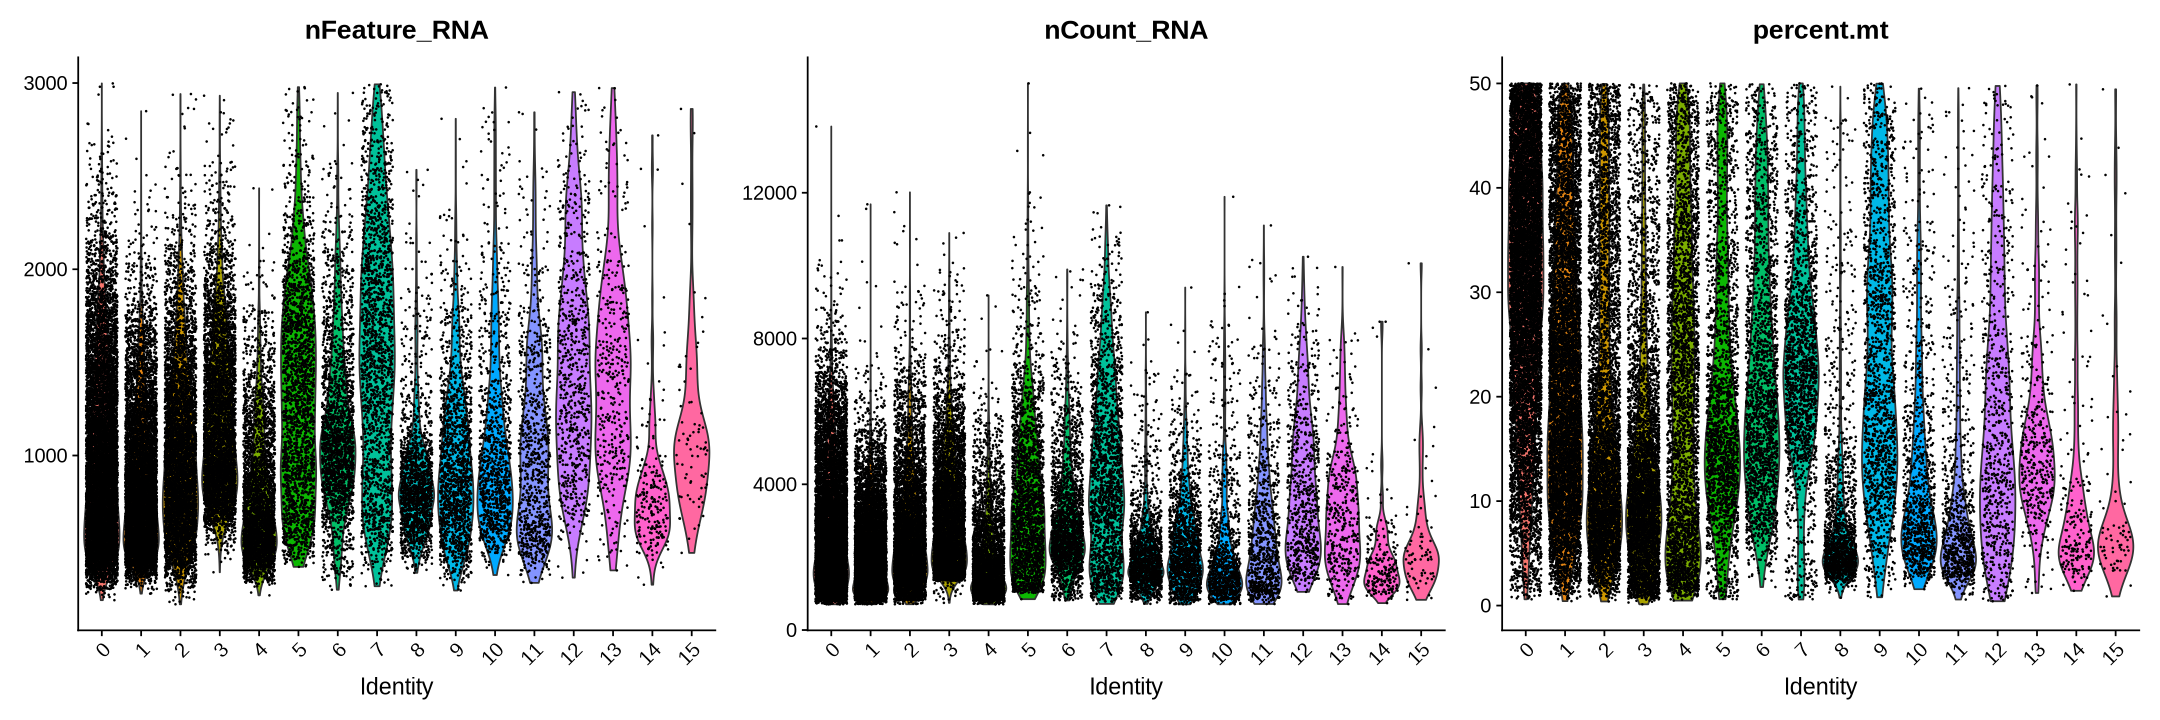

In [3]:
options(repr.plot.width = 3*6,repr.plot.height = 1*6)
print(VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3))

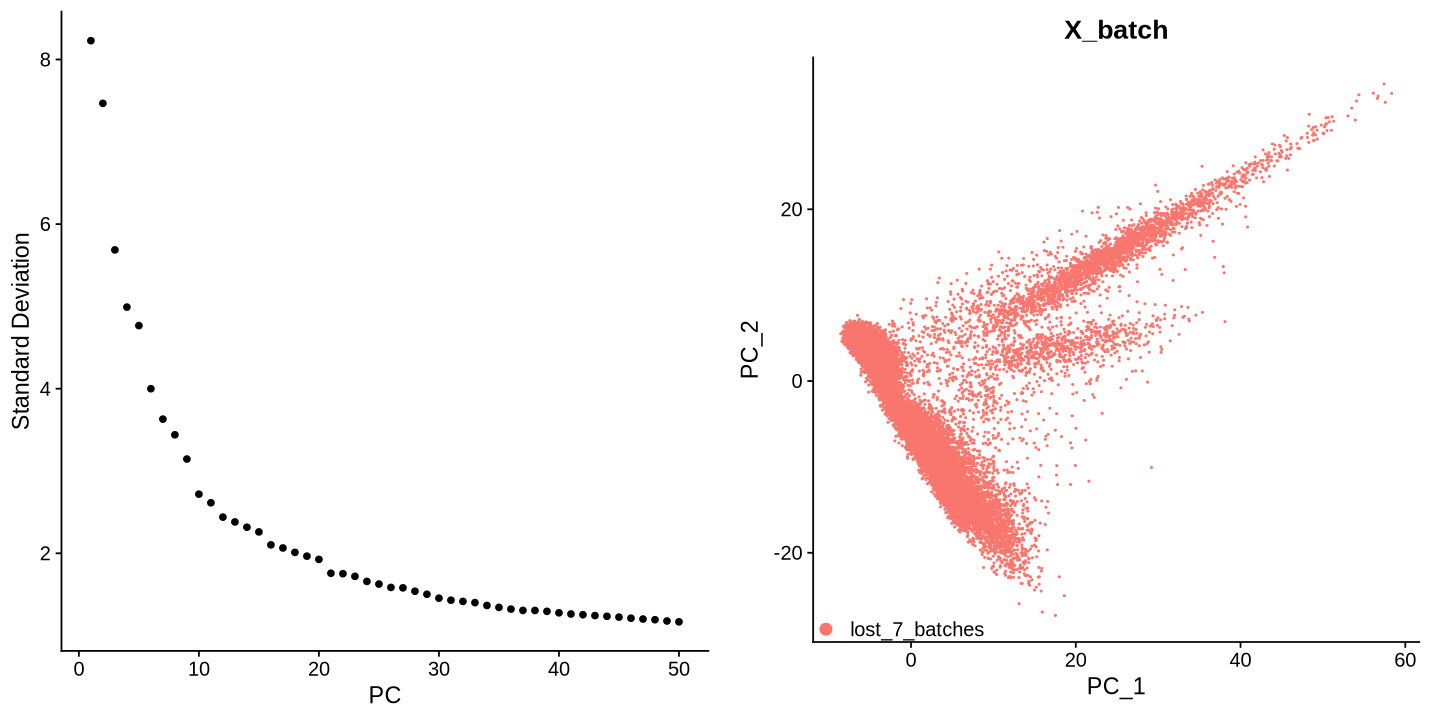

In [4]:
options(repr.plot.width = 6 * 2,repr.plot.height = 6)
p1 = ElbowPlot(adata,ndims = 50)
p2 =  DimPlot(object = adata, reduction = "pca",, group.by = 'X_batch',
        pt.size =1e4/nrow(adata@meta.data)) + them_legend
# p3 = DimPlot(object = adata, reduction = "harmony",, group.by = 'X_batch',
#         pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,nrow=1,ncol=2)
p
# savefig(p,'harmony.png',p_plot_item,width_ratio = 4*3)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,cell_type,Cluster_Number,pre_cell_type,percent.mt,RNA_snn_res.0.2,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<fct>,<fct>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,SeuratProject,1441,672,lost_7_batches,LOH,3,LOH,21.65163,1,1
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,SeuratProject,3465,1276,lost_7_batches,CD-PC,5,CD-PC,18.96104,0,0


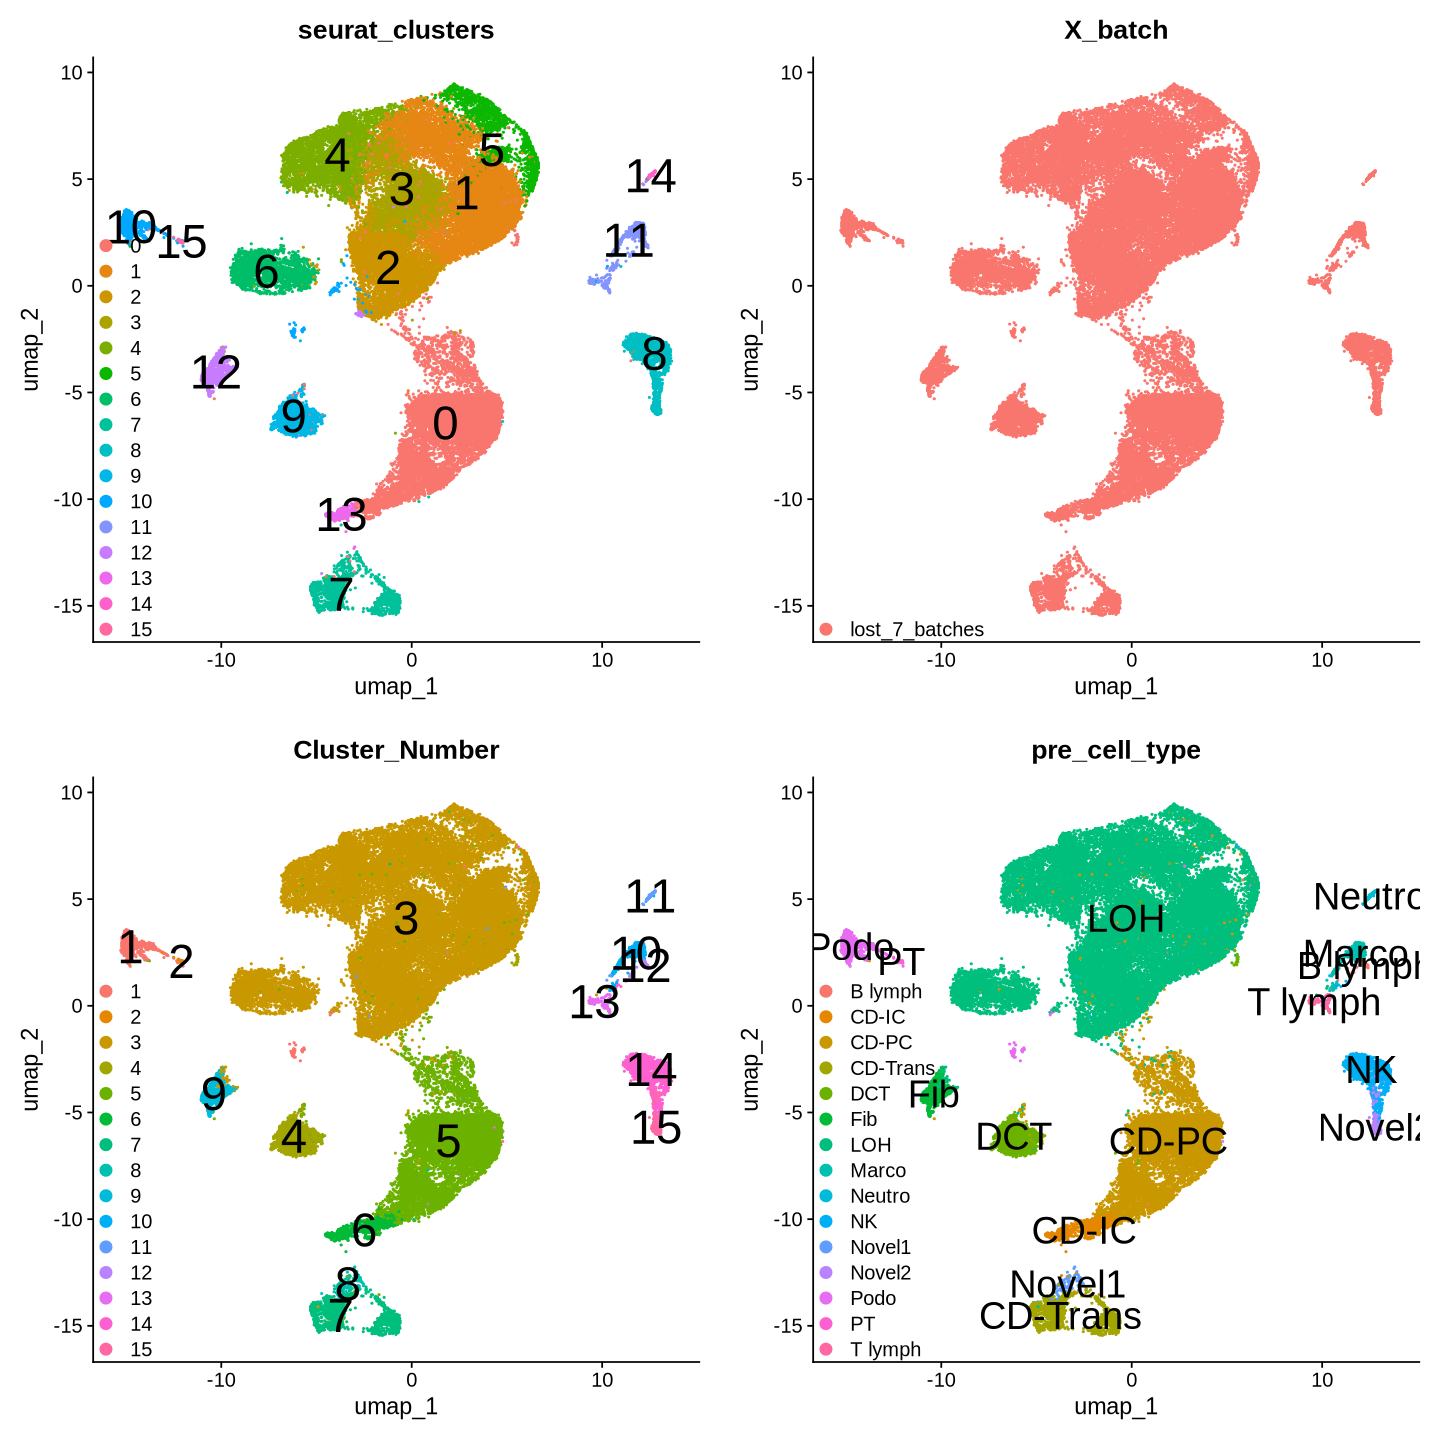

In [5]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 2*6)
adata@meta.data %>% head(2)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p2 = UMAPPlot(adata,group.by='X_batch',pt.size =1e4/nrow(adata@meta.data)) + them_legend
p3 = UMAPPlot(adata,group.by='Cluster_Number',label =TRUE,label.size=10,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p4 = UMAPPlot(adata,group.by='pre_cell_type',label =TRUE,label.size=8,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,p4,nrow=2,ncol=2)
p
# savefig(p,
#         'umap_cluster.png',p_plot_item,
#         width_ratio = 2*4,height_ratio = 2*4)

# marker_pre_cell_type

In [6]:
if(file.exists(file.path(p_root_item,'markers_pre_cell_type.csv'))){
    cat(sprintf('[read] markers_pre_cell_type.csv\n'))
    markers = read_csv(file.path(p_root_item,'markers_pre_cell_type.csv'))
}else{
    markers = list()
    for(temp in  unique(adata@meta.data$cell_type)){
        cat(sprintf('[find marker] %s\n',temp))
        markers[[temp]] = FindMarkers(adata,group.by ='pre_cell_type',ident.1=temp)
        markers[[temp]] = markers[[temp]] %>% mutate(group = temp,
                                   gene = rownames(markers[[temp]]),.before = 1)
    }
    cat(sprintf('[merge marker] %s\n',temp))
    markers = bind_rows(markers)
    markers %>% write_csv(file.path(p_root_item,'markers_pre_cell_type.csv'))
    cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_pre_cell_type.csv')))
}

markers = markers %>% select(gene,group,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
filter(p_val_adj < 0.05 ,avg_log2FC > 1,pct.1 > 0.5) %>% 
arrange(group,desc(avg_log2FC)) %>% mutate(
    group = as.character(group)
)
markers %>% head(2)

[read] markers_pre_cell_type.csv


Rows: 155454 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): group, gene
dbl (5): p_val, avg_log2FC, pct.1, pct.2, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,group,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Retnlg,B lymph,15.57509,0.757,0.001,0
S100a8,B lymph,14.33479,0.865,0.005,0


# 重新对免疫细胞进行注释

这marker真邪门

肾实质细胞咱可以不管，但免疫细胞还是得把把关

在原本细胞类型的前方加上`_`，输出时去除

In [7]:
rm(markers)
if (file.exists(file.path(p_root_item, "markers_seurat_cluster.csv"))) {
  cat(sprintf("[read] markers_seurat_cluster.csv\n"))
  markers <-  read_csv(file.path(p_root_item, "markers_seurat_cluster.csv"))
} else {
  markers <- FindAllMarkers(adata)
  markers %>% write_csv(file.path(p_root_item, "markers_seurat_cluster.csv"))
  cat(sprintf("[out] %s\n", file.path(p_root_item, "markers_seurat_cluster.csv")))
}
markers = markers %>% select(gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
    filter(p_val_adj < 0.05 ,avg_log2FC > 1,pct.1 > 0.5) %>%
    mutate(cluster = as.character(cluster)) %>% 
    arrange(cluster,desc(avg_log2FC))
markers %>% head(2)

[read] markers_seurat_cluster.csv


Rows: 102026 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Slc12a3,0,5.802078,0.817,0.080,0
Calb1,0,4.797427,0.782,0.157,0


In [8]:
tbl_cell_type <- tribble(
  ~seurat_clusters, ~cell_type,
  "0", "_CD-PC", "1", "_LOH", "2", "_LOH", "3", "_LOH",
  "4", "_LOH", "5", "_LOH", "6", "_LOH",
  "7", "_CD-Trans", "8", "T lymph", "9", "_DCT",
  "10", "_Podo", "11", "myeloid cell", "12", "Fib",
  "13", "_CD-IC", "14", "myeloid cell", "15", "_PT")
tbl_cell_type <- tbl_cell_type %>% mutate(cell_type = str_replace(cell_type, "^_", ""))
adata@meta.data = adata@meta.data %>% 
    select(cell_name,X_batch,Cluster_Number,pre_cell_type,seurat_clusters) %>% mutate(
    seurat_clusters = as.character(seurat_clusters)
) %>% left_join(tbl_cell_type,by = c('seurat_clusters' = 'seurat_clusters'))
rownames(adata@meta.data) = adata@meta.data$cell_name
adata@meta.data %>% head(2)

,cell_name,X_batch,Cluster_Number,pre_cell_type,seurat_clusters,cell_type
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,lost_7_batches,3,LOH,1,LOH
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,lost_7_batches,5,CD-PC,0,CD-PC


,cell_name,X_batch,Cluster_Number,pre_cell_type,seurat_clusters,cell_type
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,lost_7_batches,3,LOH,1,LOH
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,lost_7_batches,5,CD-PC,0,CD-PC


[out][plot] m_kidneys_GSE107585_umap_cluster.png
	in ./fig


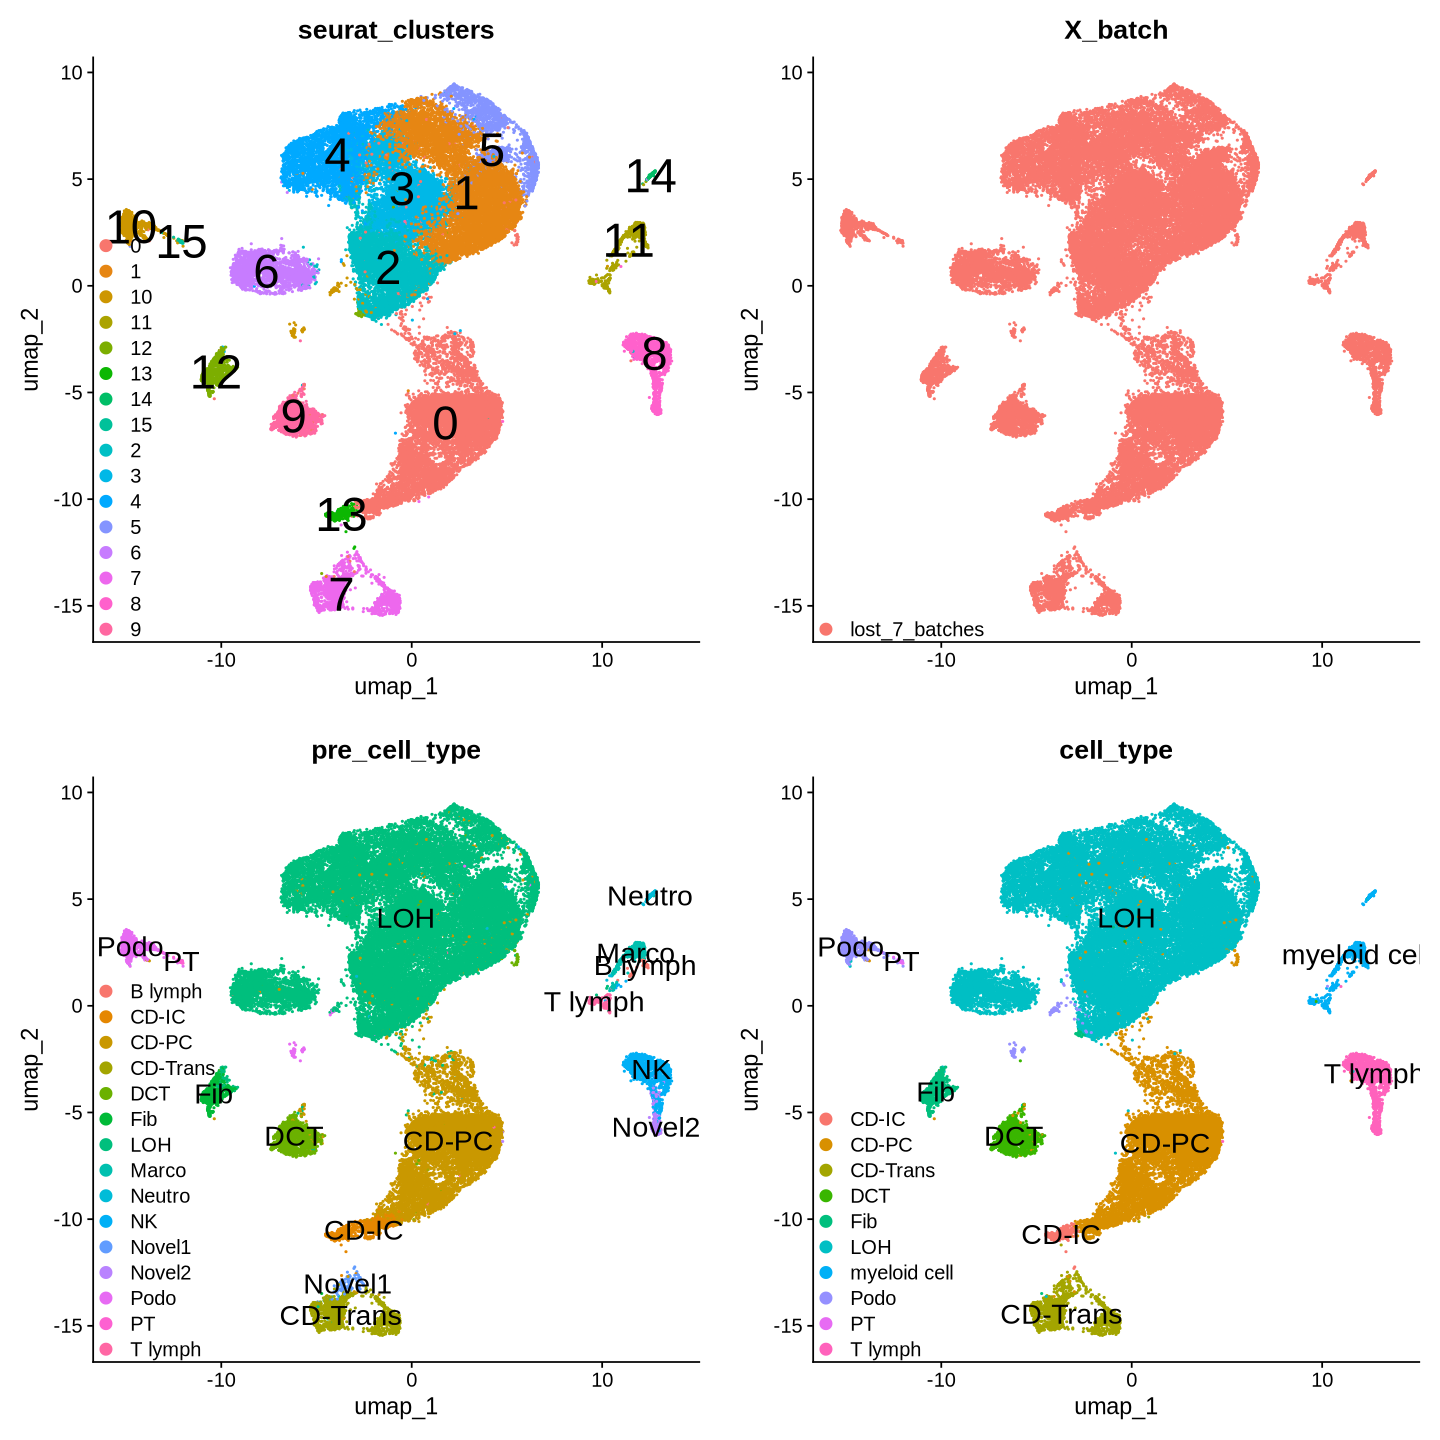

In [13]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 2*6)
adata@meta.data %>% head(2)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p2 = UMAPPlot(adata,group.by='X_batch',pt.size =1e4/nrow(adata@meta.data)) + them_legend
p3 = UMAPPlot(adata,group.by='pre_cell_type',label =TRUE,label.size=6,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p4 = UMAPPlot(adata,group.by='cell_type',label =TRUE,label.size=6,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,p4,nrow=2,ncol=2)
p
savefig(p,
        sprintf('%s_umap_cluster.png',item),p_plot_item,
        width_ratio = 2*6,height_ratio = 2*6)

In [10]:
# 8 11 14
# 8 T lymph Cd3g,Cd3d
# 11,14 myeloid cell Cd74,Fcgr3,Ctss
q_cluster = '12' 
markers_query = markers %>% filter(cluster == q_cluster)  %>% head(20) %>% arrange(desc(pct.1))
markers_query

gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
H2afz,12,3.018574,0.950,0.430,0.000000e+00
Lockd,12,6.667010,0.867,0.026,0.000000e+00
Stmn1,12,4.870944,0.857,0.088,0.000000e+00
Ube2s,12,2.425919,0.706,0.264,2.992119e-202
Nucks1,12,2.227069,0.664,0.214,1.709277e-211
Cks2,12,2.345012,0.649,0.201,7.534402e-209
Ccdc34,12,3.829302,0.636,0.065,0.000000e+00
Hmgn2,12,2.982632,0.636,0.125,0.000000e+00
Mki67,12,6.934079,0.627,0.009,0.000000e+00


[out][plot] m_kidneys_GSE107585_marker.png
	in ./fig


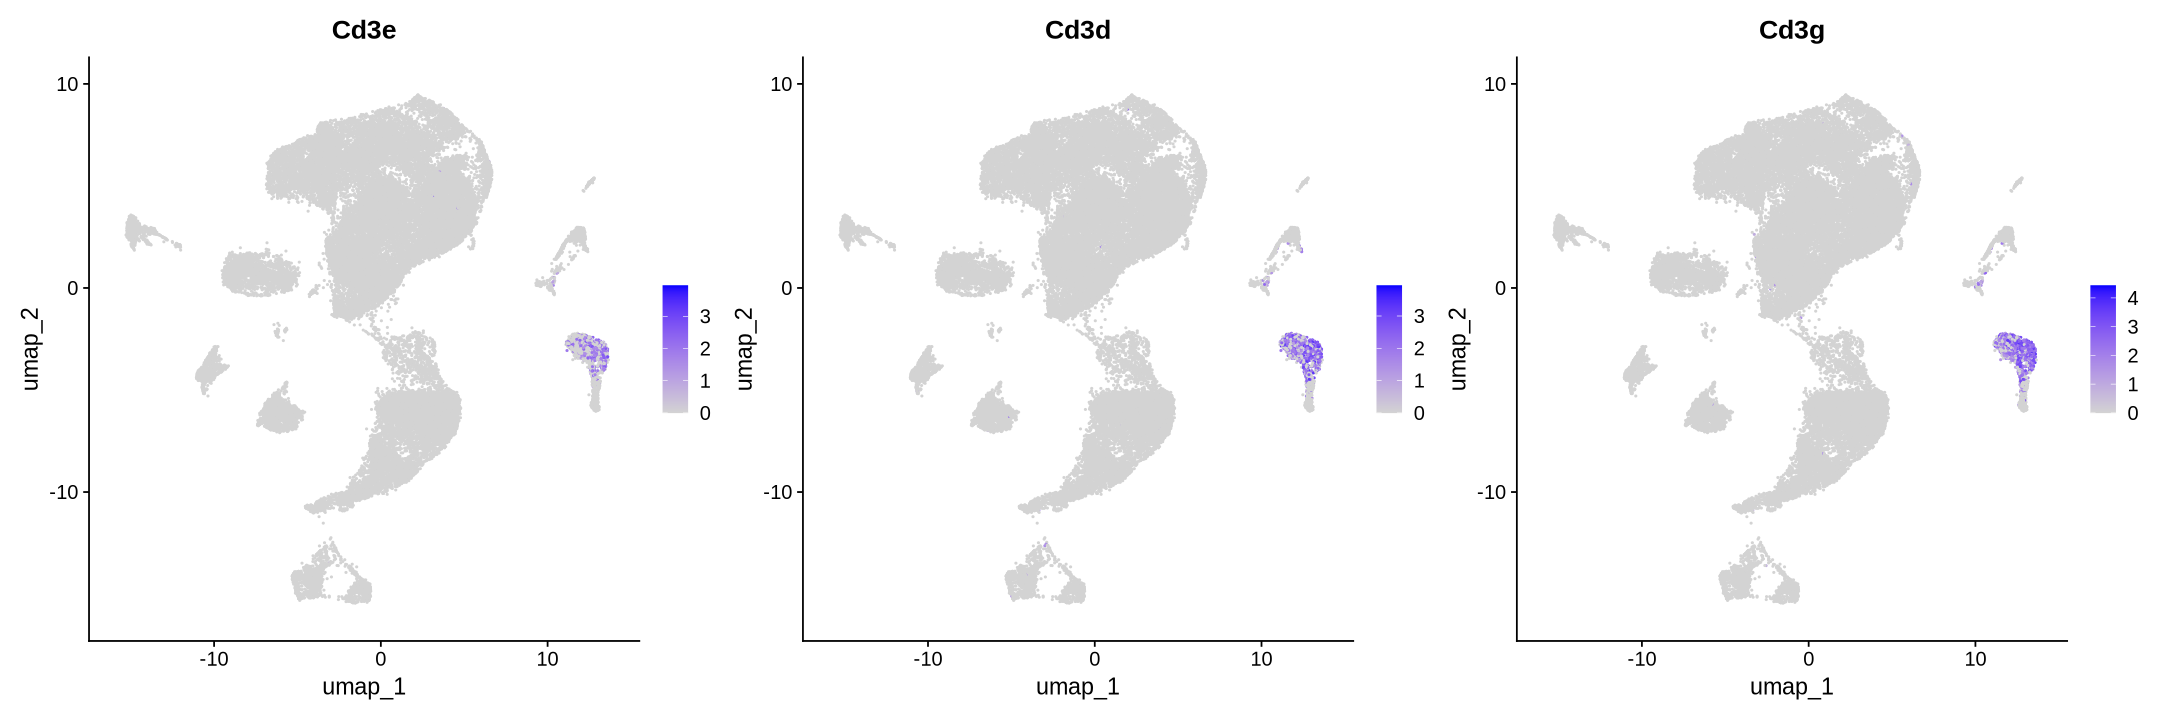

In [15]:
tbl_marker <- bind_rows(
  tibble(
    'cell_type' = 'T lymph',
    'gene' = str_split('Cd3e,Cd3d,Cd3g', ',')[[1]]
),tibble(
    'cell_type' = 'macrophage',
      'gene' = str_split('Cd74,Fcgr3,Ctss', ',')[[1]]
))
genes <- filter(tbl_marker, cell_type == 'T lymph')$gene
options(repr.plot.width = 3 * 6, repr.plot.height =
  6 * ifelse(length(genes) %% 3 == 0, floor(length(genes) %/% 3), floor(length(genes) %/% 3) + 1))
p = FeaturePlot(adata, features = genes, ncol = 3,
  pt.size = 1e4 / nrow(adata@meta.data)
)
p
savefig(p,
        sprintf('%s_marker.png',item),p_plot_item,
        width_ratio = 3*6,height_ratio = 1*6)
# tbl_marker %>% write_csv(file.path(p_root_item,'markers_plot.csv'))
# cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_plot.csv')))

# 提取UMAP坐标后，保存metadata

仅保存`cell_name,seurat_clusters,cell_type,UMAP1,UMAP2`

存为`obs_Seurat.csv`

In [12]:
df_umap = adata@reductions$umap@cell.embeddings %>% as.data.frame
df_umap = df_umap %>% mutate(
    cell_name = rownames(df_umap),.before=1
) %>% rename(UMAP1=umap_1,UMAP2=umap_2)
df_umap %>% head(2)
# ## 防止重新运行时文件被覆盖
# adata@meta.data %>% select(cell_name,seurat_clusters,cell_type) %>% left_join(
#     df_umap,by= c('cell_name' = 'cell_name')
# ) %>% write_csv(file.path(p_root_item,'obs_Seurat.csv'))
# cat(sprintf('[out] %s\n',file.path(p_root_item,'obs_Seurat.csv')))

,cell_name,UMAP1,UMAP2
,<chr>,<dbl>,<dbl>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,3.019838,-7.278323
